## Numerical variable: mean, median and mode

<img src="mean and mode.jpg" width="500"/>


### mean

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel("PopulationEstimates.xls",skiprows=2)

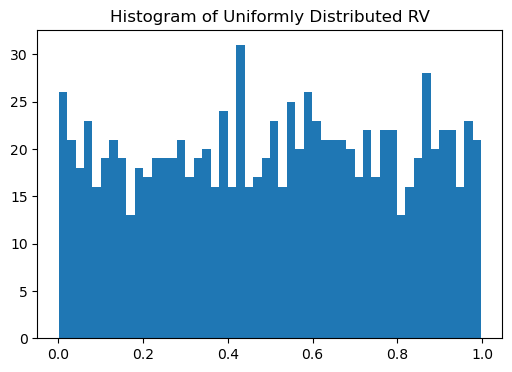

In [2]:
import random
random.seed(2019)
plt.figure(figsize=(6,4))
rvs = [random.random() for _ in range(1000)]
plt.hist(rvs, bins=50)
plt.title("Histogram of Uniformly Distributed RV");

In [3]:
np.mean(rvs)

0.5054772636416909

### median

In [4]:
np.median(rvs)

0.5136755026003803

In [5]:
rvs[-1] = 1000
print(np.mean(rvs), np.median(rvs))

1.5054701085937803 0.5150437661964872


### mode

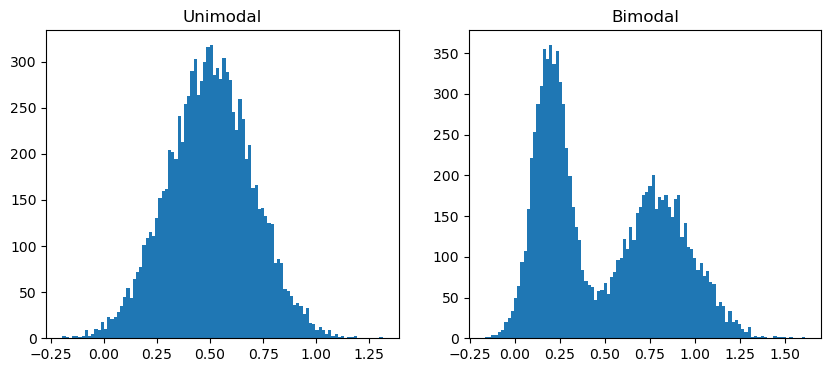

In [6]:
r1 = [random.normalvariate(0.5,0.2) for _ in range(10000)]
r2 = [random.normalvariate(0.2,0.1) for _ in range(5000)]
r3 = [random.normalvariate(0.8,0.2) for _ in range(5000)]

fig, axes = plt.subplots(1,2,figsize=(10,4))
axes[0].hist(r1,bins=100)
axes[0].set_title("Unimodal")
axes[1].hist(r2+r3,bins=100)
axes[1].set_title("Bimodal");

## Numerical variable: variance, standard deviation, quartiles and skewness

### variance

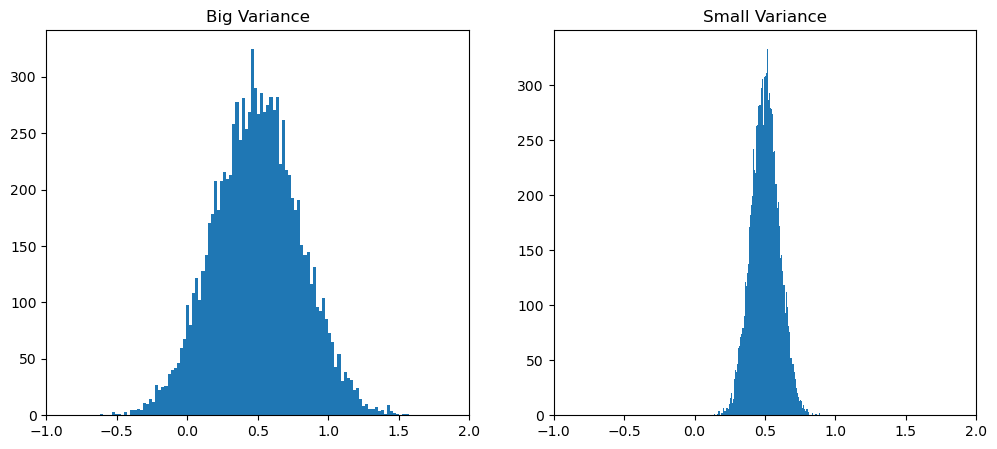

In [7]:
r1 = [random.normalvariate(0.5,0.3) for _ in range(10000)]
r2 = [random.normalvariate(0.5,0.1) for _ in range(10000)]

fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].hist(r1,bins=100)
axes[0].set_xlim([-1,2])
axes[0].set_title("Big Variance")
axes[1].hist(r2,bins=100)
axes[1].set_title("Small Variance")
axes[1].set_xlim([-1,2]);

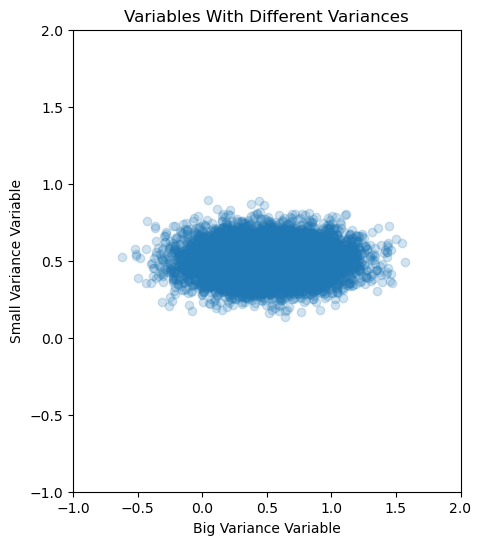

In [8]:
plt.figure(figsize=(5,6))
plt.scatter(r1,r2,alpha=0.2)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.xlabel("Big Variance Variable")
plt.ylabel("Small Variance Variable")
plt.title("Variables With Different Variances");

### standard deviation

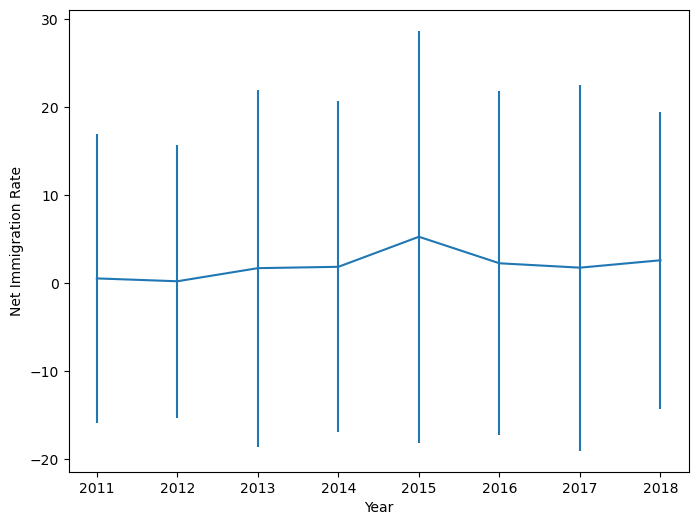

In [9]:
dfTX = df[df["State"]=="TX"].tail(-1)

YEARS = [year for year in range(2011,2019)]
MEANS = []
STDS = []
for i in range(2011,2019):
    year = "R_NET_MIG_"+str(i)
    MEANS.append(np.mean(dfTX[year]))
    STDS.append(np.std(dfTX[year]))

plt.figure(figsize=(8,6))
plt.errorbar(YEARS,MEANS,yerr=STDS)
plt.xlabel("Year")
plt.ylabel("Net Immigration Rate");

### quartiles

In [10]:
np.quantile(dfTX["R_NET_MIG_2013"],[0.25,0.5,0.75])

array([-7.83469971,  0.87919226,  8.84040759])

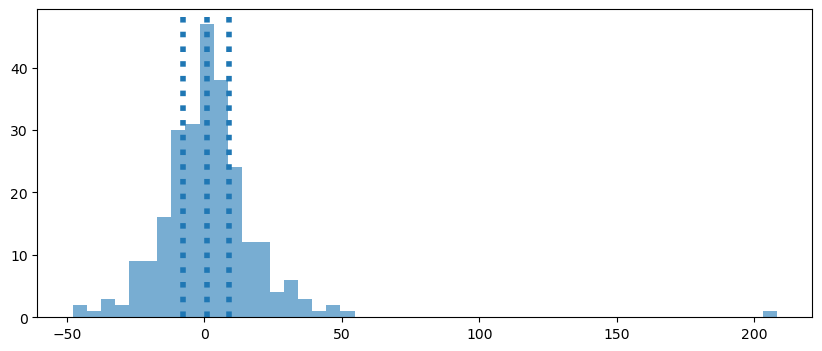

In [11]:
plt.figure(figsize=(10,4))
plt.hist(dfTX["R_NET_MIG_2013"],bins=50,alpha=0.6)
for quartile in np.quantile(dfTX["R_NET_MIG_2013"],[0.25,0.5,0.75]):
    plt.axvline(quartile,linestyle=':',linewidth=4)

### skewness

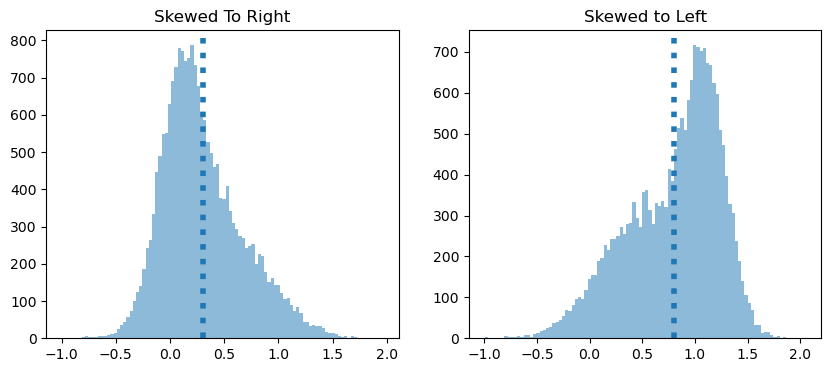

In [12]:
r1 = [random.normalvariate(0.5,0.4) for _ in range(10000)]
r2 = [random.normalvariate(0.1,0.2) for _ in range(10000)]
r3 = [random.normalvariate(1.1,0.2) for _ in range(10000)]

fig, axes = plt.subplots(1,2,figsize=(10,4))
axes[0].hist(r1+r2,bins=100,alpha=0.5)
axes[0].axvline(np.mean(r1+r2), linestyle=':',linewidth=4)
axes[0].set_title("Skewed To Right")
axes[1].hist(r1+r3,bins=100,alpha=0.5)
axes[1].axvline(np.mean(r1+r3),linestyle=':',linewidth=4)
axes[1].set_title("Skewed to Left");
